# Recursive Text Editing: Result

In [1]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

__author__ = 'Shining'
__email__ = 'mrshininnnnn@gmail.com'

In [2]:
# dependency
# public
import os
%matplotlib inline
# private
from utils import *

## Increasing Sequence Length Analysis

In [3]:
# parameters
method = 'recursion' # end2end, recursion, tagging
data_src = 'nss' # aoi, nss
data_mode = 'online' # online, offline
# bi_gru_rnn_att, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 100
min_seq_len = 5
max_seq_len = 30
data_size = 10000
val_or_test = 'test' # val, test

In [4]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}', 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [10]:
# read data
raw_data_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    file_name = os.path.join(LOG_PATH.format(i))
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_5/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_10/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_15/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_20/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_25/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/recursion/num_size_100/seq_len_30/data_size_10000/test.txt


In [6]:
# keys = ['epoch', 'step', 'loss', 'acc', 'token_acc', 'seq_acc']
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [7]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for i in range(min_seq_len, max_seq_len+1, 5):
    label = 'seq_len_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

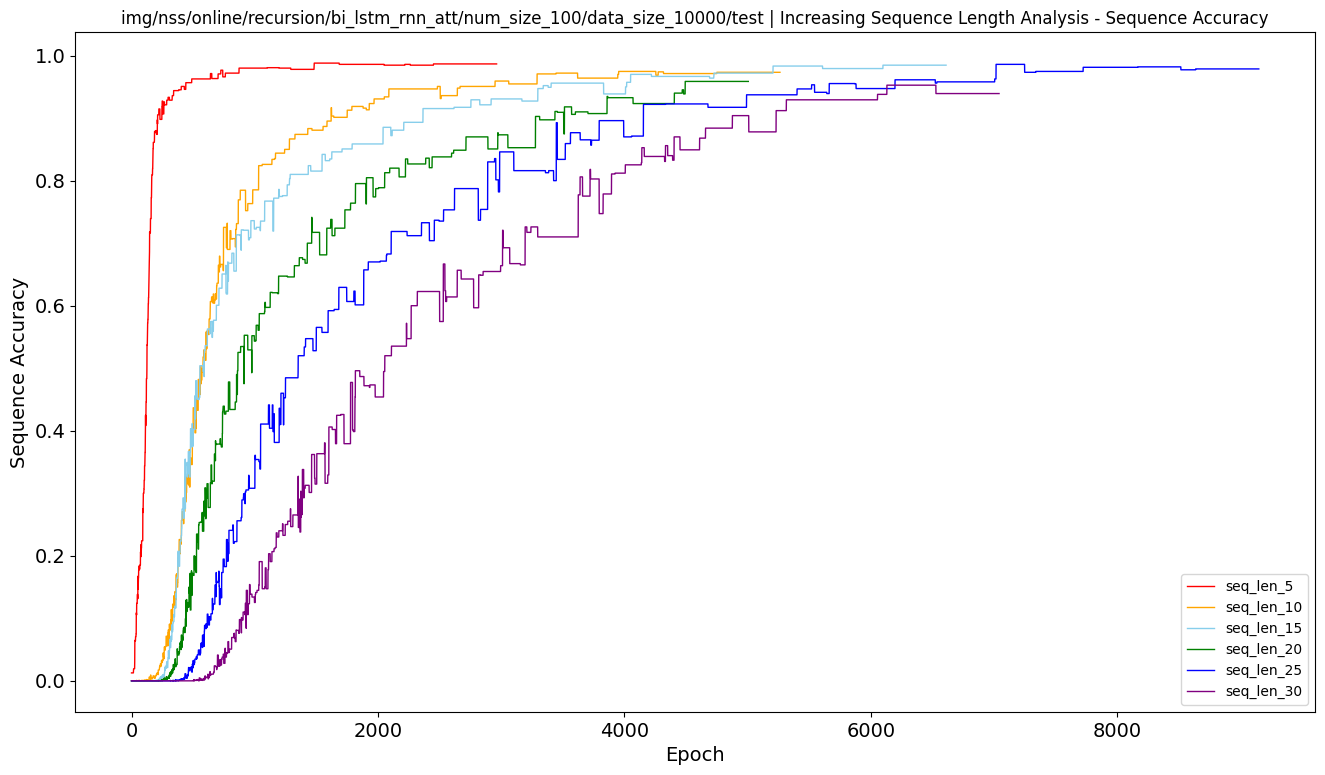

In [8]:
colors = ['red', 'orange', 'skyblue', 'green', 'blue', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Increasing Data Size Analysis

In [159]:
# parameters
method = 'rec' # e2e, tag, rec
data_src = 'aor' # aes, aor, aec
data_mode = 'online' # online, offline
# bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 30000
val_or_test = 'test' # val, test

In [160]:
# define path
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    data_mode, 
    model_name, 
    method,
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', 
    '{}.txt'.format(val_or_test))

In [161]:
# read data
raw_data_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    file_name = LOG_PATH.format(i)
    print(file_name)
    raw_data_dict[file_name] = load_txt(file_name)

log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_10000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_20000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_30000/test.txt


In [162]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [163]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for i in range(min_data_size, max_data_size+1, 10000):
    label = 'data_size_{}'.format(i)
    key = LOG_PATH.format(i)
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

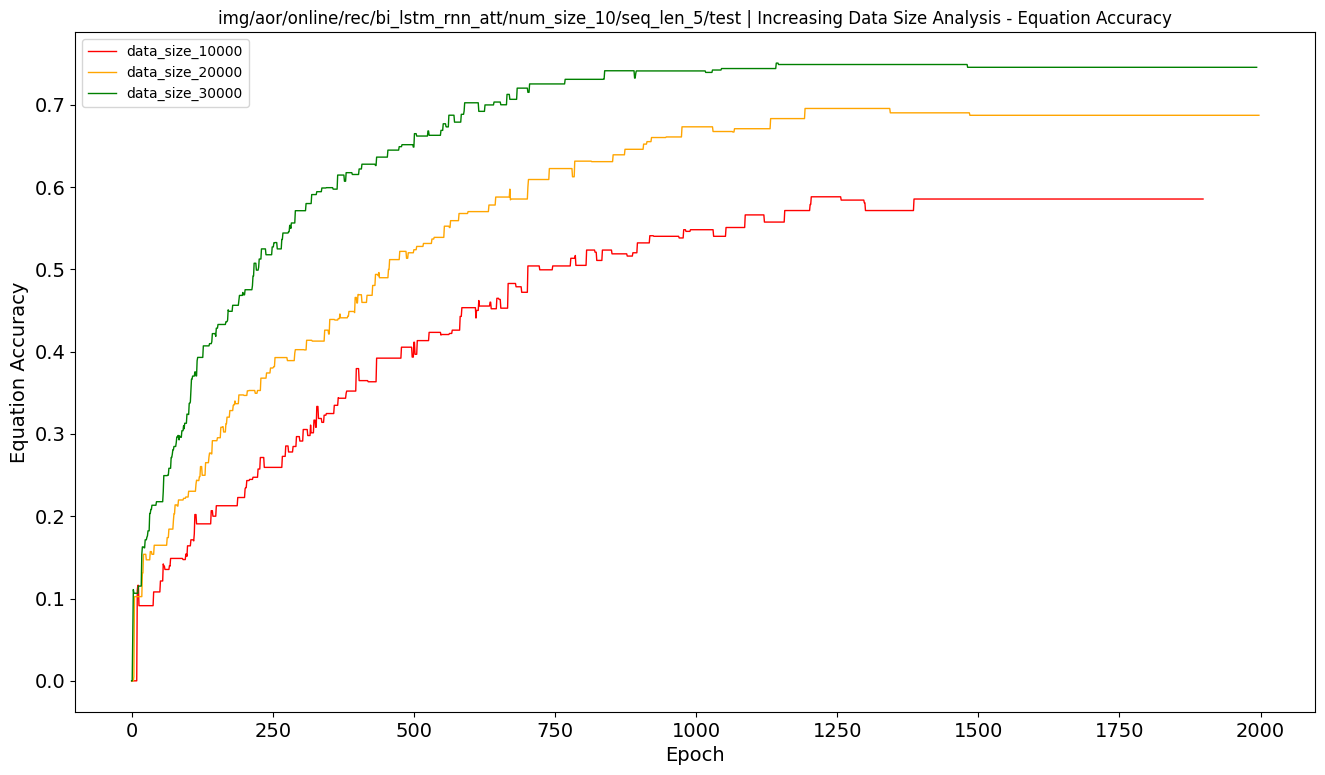

In [164]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    data_mode, 
    method, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods Comparison

In [84]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'], 
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
data_src = 'aor' # aes, aor, aec
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
data_size = 30000
val_or_test = 'test' # val, test

In [85]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode 
    model_name, # model name
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    '{}.txt'.format(val_or_test))

In [86]:
# read data
raw_data_dict = {}
for c in candidates:
    file_path = LOG_PATH.format(c[0], c[1])
    print(file_path)
    raw_data_dict[file_path] = load_txt(file_path)

log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/online/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/offline/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/online/bi_lstm_rnn_att/rec/num_size_10/seq_len_5/data_size_30000/test.txt


In [87]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [88]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    key = LOG_PATH.format(c[0], c[1])
    criteria_list = [data[criteria] for data in data_dict[key]]
    criteria_dict[label] = criteria_list

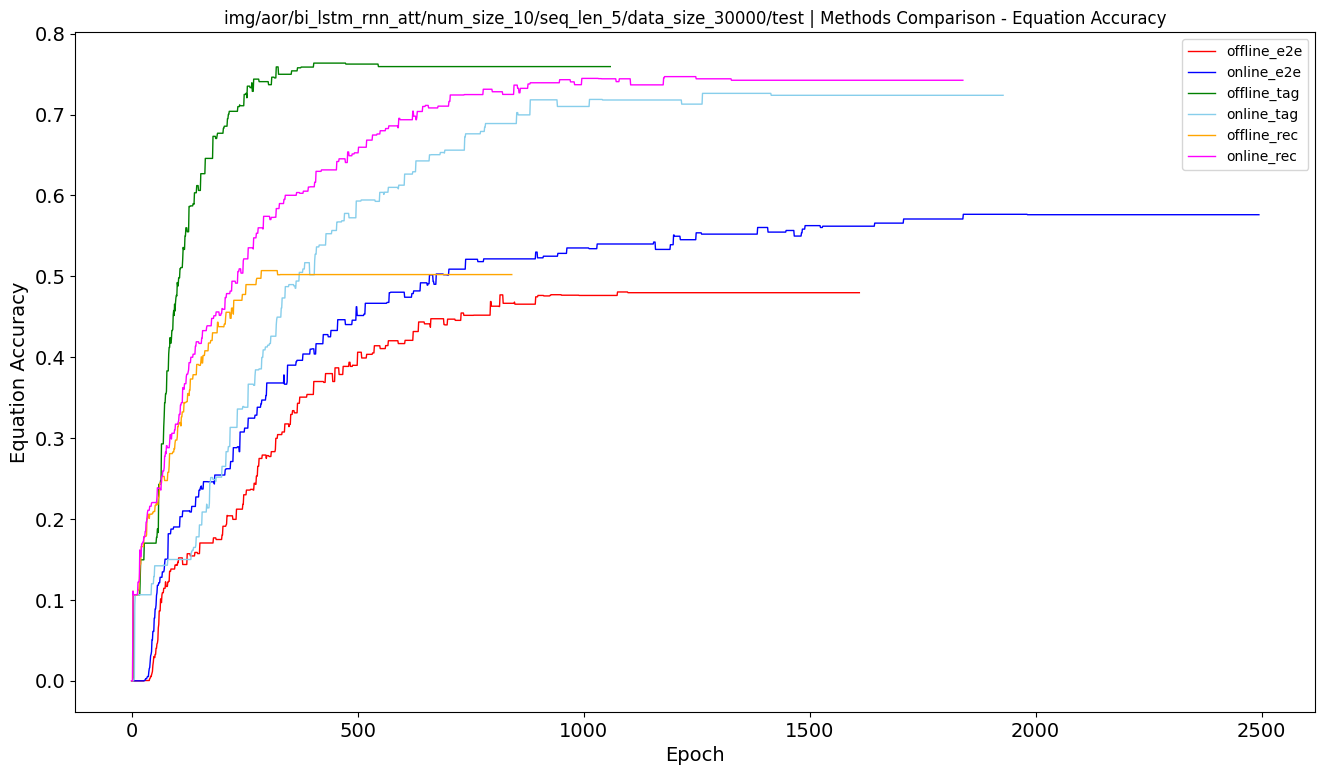

In [89]:
colors = ['red', 'blue', 'green', 'skyblue', 'orange', 'magenta', 'purple']
save_path = os.path.join(
    'img', 
    data_src, 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Epoch', 
    ylabel=criteria, 
    save_path=save_path)

## Methods vs. Sequence Length

In [10]:
# parameters
candidates = [
    ['offline', 'end2end'], 
#     ['offline', 'recursion'], 
    ['online', 'end2end'], 
#     ['online', 'tagging'], 
    ['online', 'recursion']
]
# aoi, nss
data_src = 'nss'
model_name = 'bi_lstm_rnn_att'
num_size = 100
data_size = 10000
min_seq_len = 5
max_seq_len = 30
val_or_test = 'test' # val, test

In [11]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    '{}'.format(data_src), 
    '{}', # data mode
    '{}'.format(model_name),
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}', # sequence length
    'data_size_{}'.format(data_size),
    '{}.txt'.format(val_or_test))

In [12]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_seq_len, max_seq_len+1, 5): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)[40:-4]

log/nss/offline/bi_lstm_rnn_att/end2end/num_size_100/seq_len_5/data_size_10000/test.txt
log/nss/offline/bi_lstm_rnn_att/end2end/num_size_100/seq_len_10/data_size_10000/test.txt
log/nss/offline/bi_lstm_rnn_att/end2end/num_size_100/seq_len_15/data_size_10000/test.txt
log/nss/offline/bi_lstm_rnn_att/end2end/num_size_100/seq_len_20/data_size_10000/test.txt
log/nss/offline/bi_lstm_rnn_att/end2end/num_size_100/seq_len_25/data_size_10000/test.txt
log/nss/offline/bi_lstm_rnn_att/end2end/num_size_100/seq_len_30/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/end2end/num_size_100/seq_len_5/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/end2end/num_size_100/seq_len_10/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/end2end/num_size_100/seq_len_15/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/end2end/num_size_100/seq_len_20/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_att/end2end/num_size_100/seq_len_25/data_size_10000/test.txt
log/nss/online/bi_lstm_rnn_a

In [13]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [14]:
# 'Epoch', 'Step', 'Loss', 'Equation Accuracy', 'Token Accuracy', 'Sequence Accuracy'
criteria = 'Sequence Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_seq_len, max_seq_len+1, 5): 
        key = LOG_PATH.format(c[0], c[1], i)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [15]:
print(criteria_dict)

{'offline_end2end': [0.9927, 0.9813, 0.9613, 0.9753, 0.964, 0.9587], 'online_end2end': [0.986, 0.9653, 0.9707, 0.9653, 0.948, 0.9487], 'online_recursion': [0.9867, 0.9733, 0.9847, 0.9587, 0.9787, 0.9393]}


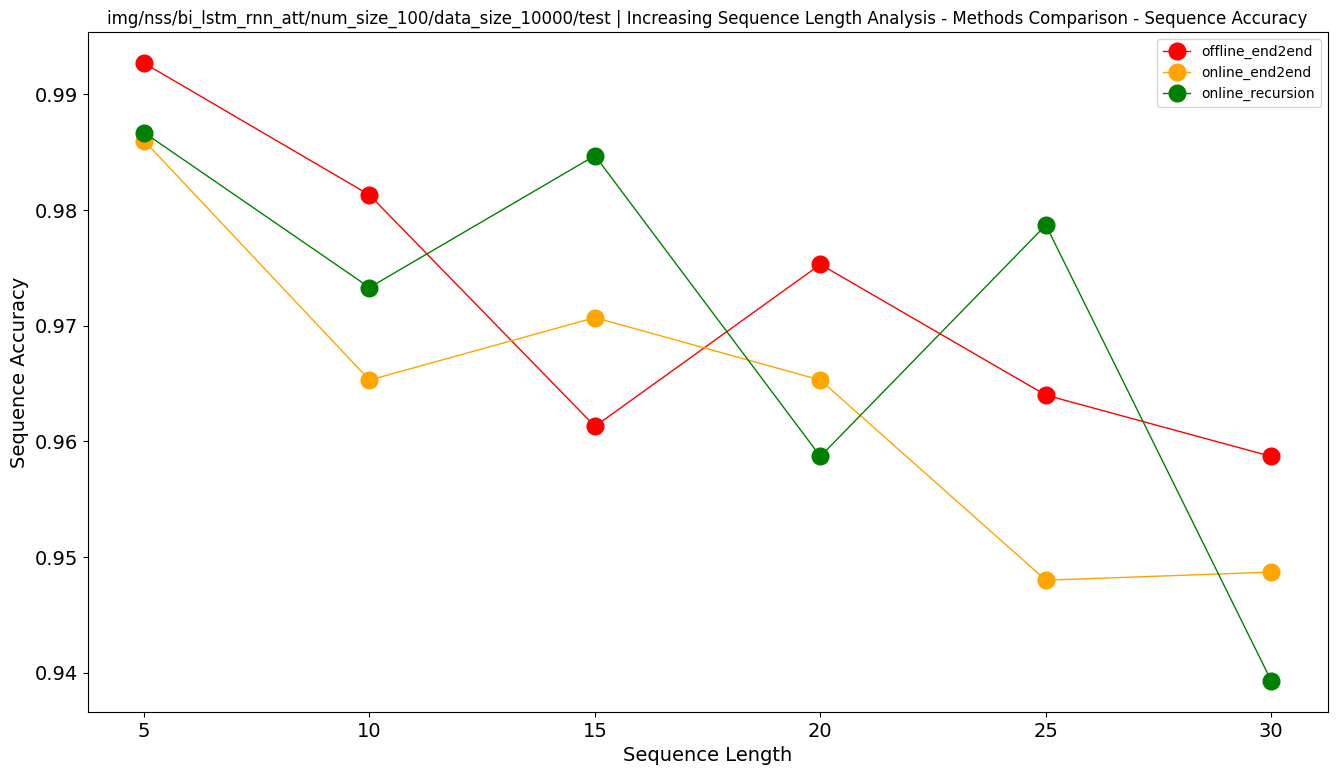

In [16]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'data_size_{}'.format(data_size), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Sequence Length Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Sequence Length', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_seq_len, max_seq_len+1, 5), 
    marker=True
)

## Methods vs. Data Size

In [183]:
# parameters
candidates = [
    ['offline', 'e2e'], 
    ['online', 'e2e'], 
    ['offline', 'tag'],
    ['online', 'tag'], 
    ['offline', 'rec'], 
    ['online', 'rec']
]
# aes, aor, aec
data_src = 'aor'
# transformer, bi_lstm_rnn_att
model_name = 'bi_lstm_rnn_att'
num_size = 10
seq_len = 5
min_data_size = 10000
max_data_size = 40000
val_or_test = 'test' # val, test

In [184]:
# define path for end2end
LOG_PATH = os.path.join(
    'log', 
    data_src, 
    '{}', # data mode
    model_name, # model name
    '{}', # method
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    'data_size_{}', # data size 
    '{}.txt'.format(val_or_test))

In [185]:
# read data
raw_data_dict = {}
for c in candidates: 
    for i in range(min_data_size, max_data_size+1, 10000): 
        file_name = LOG_PATH.format(c[0], c[1], i)
        print(file_name)
        raw_data_dict[file_name] = load_txt(file_name)

log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_10000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_20000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/offline/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_40000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_10000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_20000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/online/bi_lstm_rnn_att/e2e/num_size_10/seq_len_5/data_size_40000/test.txt
log/aor/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_10000/test.txt
log/aor/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_20000/test.txt
log/aor/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_30000/test.txt
log/aor/offline/bi_lstm_rnn_att/tag/num_size_10/seq_len_5/data_size_40000/test.txt
log/aor/

In [186]:
# extract info from log
data_dict = {k: parse_log(v) for k, v in raw_data_dict.items()}

In [190]:
# 'Epoch', 'Step', 'Loss', 'Token Accuracy', 'Sequence Accuracy', 'Equation Accuracy'
criteria = 'Equation Accuracy'
criteria_dict = {}
for c in candidates:
    label = '_'.join(c)
    criteria_list = []
    for i in range(min_data_size, max_data_size+1, 10000):
        key = LOG_PATH.format(c[0], c[1], i)
#         print(key)
        criteria_list.append(data_dict[key][-1][criteria])
    criteria_dict[label] = criteria_list

In [191]:
print(criteria_dict)

{'offline_e2e': [0.2647, 0.4243, 0.4798, 0.6397], 'online_e2e': [0.2933, 0.4233, 0.5762, 0.6448], 'offline_tag': [0.5053, 0.6503, 0.7389, 0.776], 'online_tag': [0.514, 0.643, 0.7238, 0.7763], 'offline_rec': [0.3113, 0.41, 0.5022, 0.5397], 'online_rec': [0.5853, 0.687, 0.7453, 0.8012]}


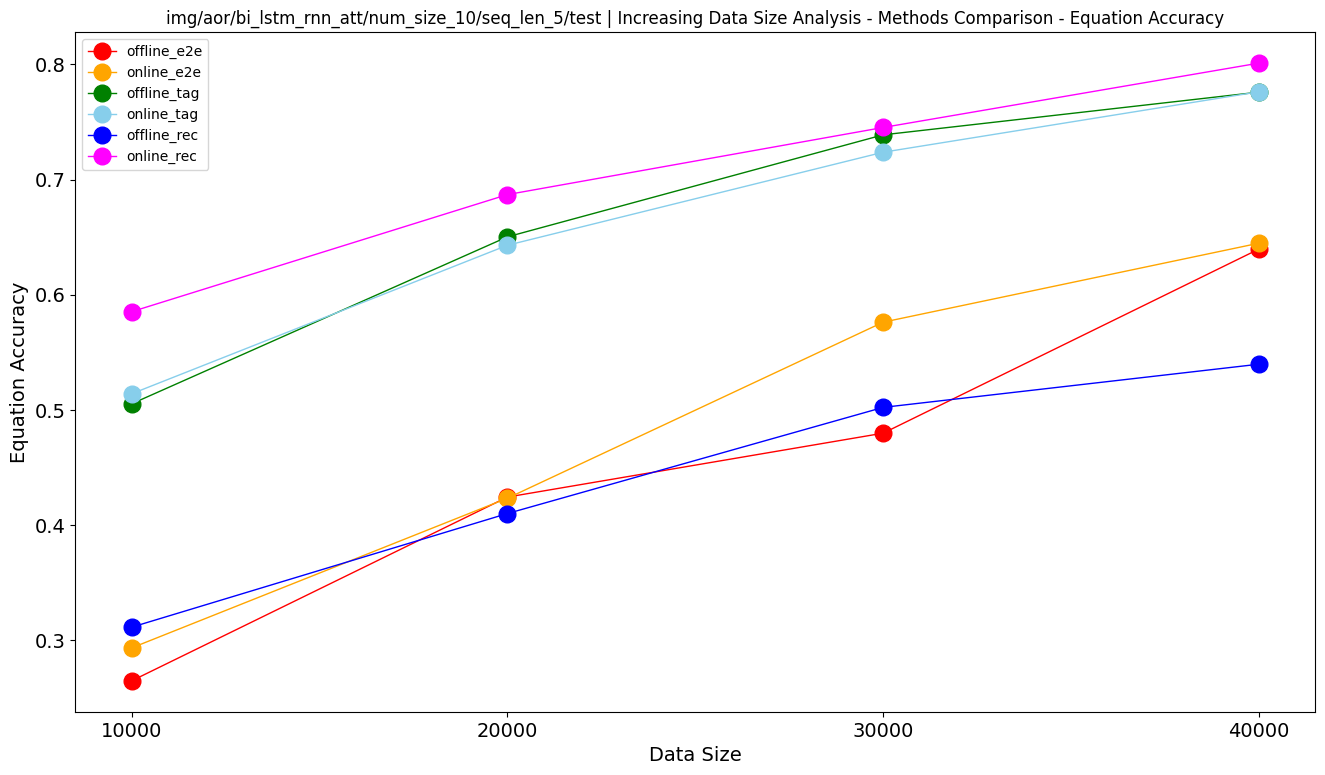

In [192]:
colors = ['red', 'orange', 'green', 'skyblue', 'blue', 'magenta', 'purple']
save_path = os.path.join(
    'img',
    '{}'.format(data_src), 
    model_name, 
    'num_size_{}'.format(num_size), 
    'seq_len_{}'.format(seq_len), 
    val_or_test)

if not os.path.exists(save_path): os.makedirs(save_path)

title = 'Increasing Data Size Analysis - Methods Comparison - {}'.format(criteria)

show_plot(
    data_dict=criteria_dict, 
    colors=colors, 
    title=title, 
    xlabel='Data Size', 
    ylabel=criteria, 
    save_path=save_path, 
    xticks=range(min_data_size, max_data_size+1, 10000), 
    marker=True
)